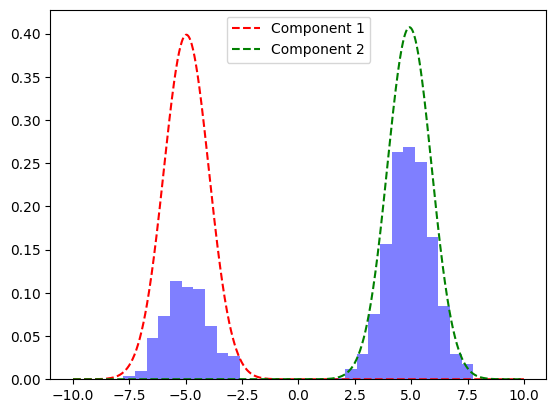

均值1: -4.972470424712125
标准差1: 1.0007013135109484
均值2: 4.923549171347625
标准差2: 0.9794626928010496
混合系数: 0.30000000000201044


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 生成模拟数据
np.random.seed(0)
data = np.concatenate([np.random.normal(-5, 1, 300), np.random.normal(5, 1, 700)])

# 初始化参数
mu1, std1 = -4, 1
mu2, std2 = 4, 1
pi = 0.5

# EM算法迭代
num_iterations = 50
for iteration in range(num_iterations):
    # E步骤：计算每个数据点属于每个分布的概率
    likelihood1 = norm.pdf(data, mu1, std1)
    likelihood2 = norm.pdf(data, mu2, std2)
    total_likelihood = pi * likelihood1 + (1 - pi) * likelihood2
    responsibility1 = pi * likelihood1 / total_likelihood
    responsibility2 = (1 - pi) * likelihood2 / total_likelihood

    # M步骤：更新参数
    mu1 = np.sum(responsibility1 * data) / np.sum(responsibility1)
    std1 = np.sqrt(np.sum(responsibility1 * (data - mu1)**2) / np.sum(responsibility1))
    mu2 = np.sum(responsibility2 * data) / np.sum(responsibility2)
    std2 = np.sqrt(np.sum(responsibility2 * (data - mu2)**2) / np.sum(responsibility2))
    pi = np.mean(responsibility1)

# 绘制拟合结果
x = np.linspace(-10, 10, 1000)
pdf1 = norm.pdf(x, mu1, std1)
pdf2 = norm.pdf(x, mu2, std2)
plt.hist(data, bins=30, density=True, alpha=0.5, color='b')
plt.plot(x, pdf1, label='Component 1', linestyle='--', color='r')
plt.plot(x, pdf2, label='Component 2', linestyle='--', color='g')
plt.legend()
plt.show()

print("均值1:", mu1)
print("标准差1:", std1)
print("均值2:", mu2)
print("标准差2:", std2)
print("混合系数:", pi)


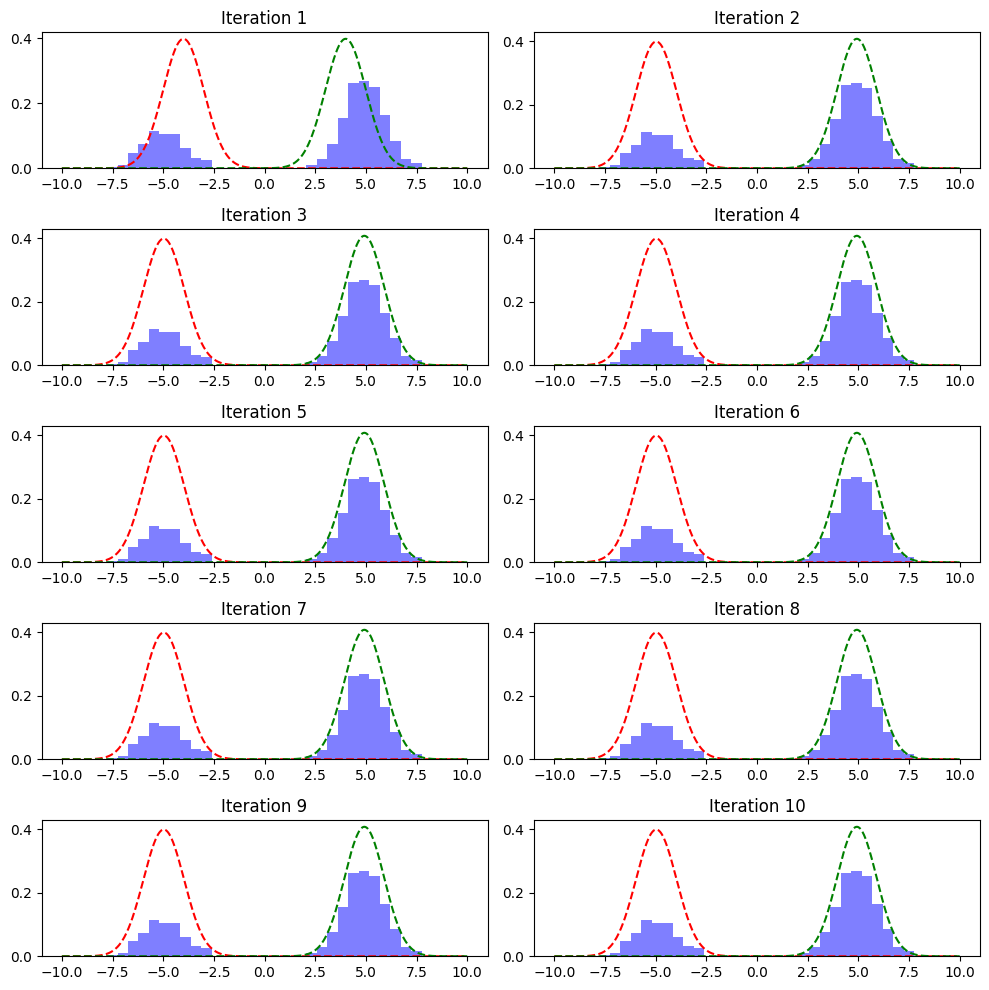

均值1: -4.972470424712125
标准差1: 1.0007013135109484
均值2: 4.923549171347625
标准差2: 0.9794626928010496
混合系数: 0.30000000000201044


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 生成模拟数据
np.random.seed(0)
data = np.concatenate([np.random.normal(-5, 1, 300), np.random.normal(5, 1, 700)])

# 初始化参数
mu1, std1 = -4, 1
mu2, std2 = 4, 1
pi = 0.5

# 创建子图以动态显示拟合结果
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

# EM算法迭代
num_iterations = 10
for iteration in range(num_iterations):
    # 绘制当前拟合结果
    x = np.linspace(-10, 10, 1000)
    pdf1 = norm.pdf(x, mu1, std1)
    pdf2 = norm.pdf(x, mu2, std2)
    axes[iteration].hist(data, bins=30, density=True, alpha=0.5, color='b')
    axes[iteration].plot(x, pdf1, label='Component 1', linestyle='--', color='r')
    axes[iteration].plot(x, pdf2, label='Component 2', linestyle='--', color='g')
    axes[iteration].set_title(f'Iteration {iteration + 1}')
    
    # E步骤：计算每个数据点属于每个分布的概率
    likelihood1 = norm.pdf(data, mu1, std1)
    likelihood2 = norm.pdf(data, mu2, std2)
    total_likelihood = pi * likelihood1 + (1 - pi) * likelihood2
    responsibility1 = pi * likelihood1 / total_likelihood
    responsibility2 = (1 - pi) * likelihood2 / total_likelihood

    # M步骤：更新参数
    mu1 = np.sum(responsibility1 * data) / np.sum(responsibility1)
    std1 = np.sqrt(np.sum(responsibility1 * (data - mu1)**2) / np.sum(responsibility1))
    mu2 = np.sum(responsibility2 * data) / np.sum(responsibility2)
    std2 = np.sqrt(np.sum(responsibility2 * (data - mu2)**2) / np.sum(responsibility2))
    pi = np.mean(responsibility1)

plt.tight_layout()
plt.show()

print("均值1:", mu1)
print("标准差1:", std1)
print("均值2:", mu2)
print("标准差2:", std2)
print("混合系数:", pi)
